In [18]:
# real_traffic_prediction.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [19]:
df=pd.read_csv("/kaggle/input/dataset-traffic-model/Metro_Interstate_Traffic_Volume.csv")


print(df.head())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0     NaN  288.28      0.0      0.0          40       Clouds   
1     NaN  289.36      0.0      0.0          75       Clouds   
2     NaN  289.58      0.0      0.0          90       Clouds   
3     NaN  290.13      0.0      0.0          90       Clouds   
4     NaN  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  


In [20]:
df['date_time'] = pd.to_datetime(df['date_time'])


df['hour'] = df['date_time'].dt.hour
df['day'] = df['date_time'].dt.day
df['weekday'] = df['date_time'].dt.weekday
df['month'] = df['date_time'].dt.month
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)

df = df.drop(columns=['date_time'])

In [21]:
features = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'hour', 'weekday', 'is_weekend']
target = 'traffic_volume'

X = df[features]
y = df[target]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [23]:
preds = model.predict(X_test)
mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 255.33
RMSE: 466.21


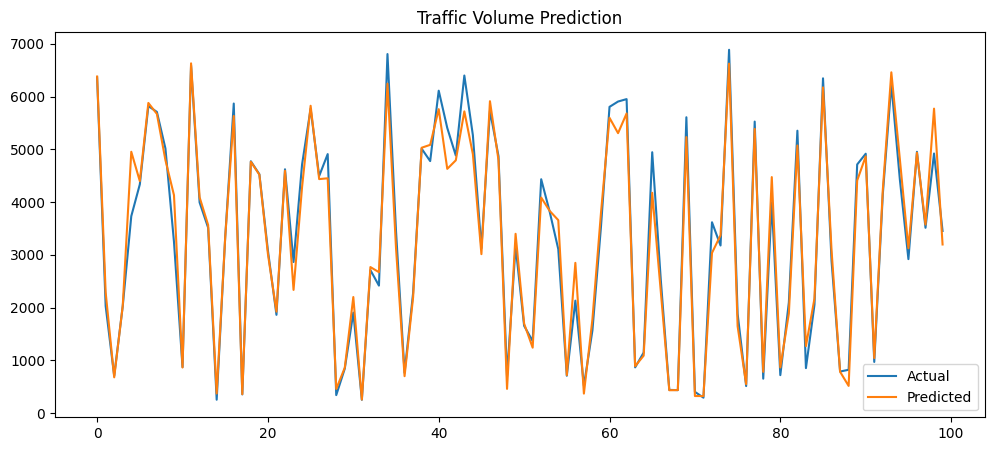

In [24]:
plt.figure(figsize=(12,5))
plt.plot(y_test.values[:100], label="Actual")
plt.plot(preds[:100], label="Predicted")
plt.title("Traffic Volume Prediction")
plt.legend()
plt.show()